# 12 Time Use Survey

###### This dataset comprises demographic, select personal and other attributes of a subset of Americans. For example, use Explore to find interesting trends about how Americans spend their time.

In [32]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# 1 Get the Data

In [33]:
df = pd.read_csv('12 WA_American-Time-Use-Survey-lite.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97275 entries, 0 to 97274
Data columns (total 23 columns):
Education Level           97275 non-null object
Age                       97275 non-null int64
Age Range                 97275 non-null object
Employment Status         97275 non-null object
Gender                    97275 non-null object
Children                  97275 non-null int64
Weekly Earnings           97275 non-null int64
Year                      97275 non-null int64
Weekly Hours Worked       97275 non-null int64
Sleeping                  97275 non-null int64
Grooming                  97275 non-null int64
Housework                 97275 non-null int64
Food & Drink Prep         97275 non-null int64
Caring for Children       97275 non-null int64
Playing with Children     97275 non-null int64
Job Searching             97275 non-null int64
Shopping                  97275 non-null int64
Eating and Drinking       97275 non-null int64
Socializing & Relaxing    97275 non-null 

In [34]:
df1 = df[(df['Age']>=20) & (df['Age']<=69)].copy()
df2 = df1[(df1['Weekly Hours Worked']<=69) & (df1['Weekly Hours Worked']>=10)].copy()
df3 = df2[(df2['Weekly Earnings']>200) & (df2['Weekly Earnings']<2000)].copy()
df4 = df3[df3['Children']<=3].copy()

In [35]:
def func_EL (x):
    if x in ('9th grade','10th grade','11th grade','12th grade','High School'): return '1. Lower'
    elif x in ('Some College','Associate Degree'): return '2. Meduim'
    elif x in ('Bachelor','Master'): return '3. Higher'
    elif x in ('Doctoral Degree','Prof. Degree'): return '4. Professional'
    else: return '5. Others'
df4['Education Level bin'] = df4['Education Level'].apply(func_EL)

In [36]:
def func_WHW (x):
    if x<25: return '1. y < 25'
    elif x<40: return '2. y < 40'
    elif x==40: return '3. y = 40'
    elif x<50: return '4. y < 50'
    else: return '5. y >= 50'
df4['Weekly Hours Worked bin'] = df4['Weekly Hours Worked'].apply(func_WHW)

In [37]:
df = df4[['Education Level bin','Gender','Weekly Earnings','Weekly Hours Worked bin']].copy()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40877 entries, 1 to 97273
Data columns (total 4 columns):
Education Level bin        40877 non-null object
Gender                     40877 non-null object
Weekly Earnings            40877 non-null int64
Weekly Hours Worked bin    40877 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


# 2a Education Level

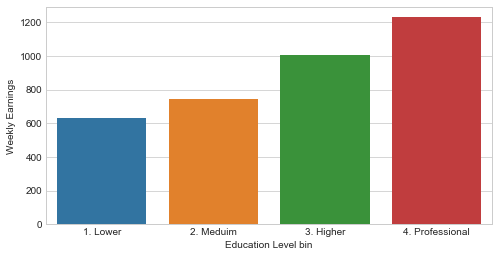

In [38]:
temp = pd.DataFrame(df.groupby(['Education Level bin'], axis=0, as_index=False)['Weekly Earnings'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="Education Level bin", y="Weekly Earnings",data=temp)

# 2b Weekly Hours Worked

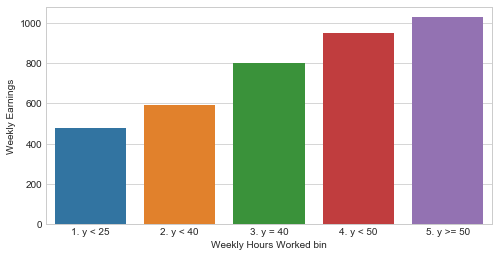

In [39]:
temp = pd.DataFrame(df.groupby(['Weekly Hours Worked bin'], axis=0, as_index=False)['Weekly Earnings'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="Weekly Hours Worked bin", y="Weekly Earnings",data=temp)

 # 3 Train Test Split

In [40]:
def WE_bins (x):
    if x <= 500: return "a. less than 500"
    else: return "b. more than 500"
df['actual'] = df['Weekly Earnings'].apply(WE_bins)

In [41]:
cat_feats = ['Education Level bin','Gender','Weekly Hours Worked bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [42]:
x = final_data.drop(['Weekly Earnings','actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

Text(0,0.5,'Error Rate')

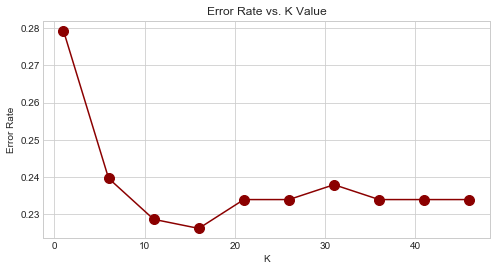

In [43]:
error_rate = []
for i in range(1,51,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,51,5),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# 5 Predictions and Evaluation

In [44]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(y_test==y_pred)*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(y_test,y_pred))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(y_test,y_pred))

accuracy
77.38 %


classification_report
                  precision    recall  f1-score   support

a. less than 500       0.63      0.49      0.55      3489
b. more than 500       0.81      0.89      0.85      8775

     avg / total       0.76      0.77      0.76     12264



confusion_matrix
[[1702 1787]
 [ 987 7788]]
